In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [ ]:
centriods = [(-8,-8), (8,8)]
cluster_std = [1, 1]

X,y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centriods, n_features=2, random_state=42)

<Axes: >

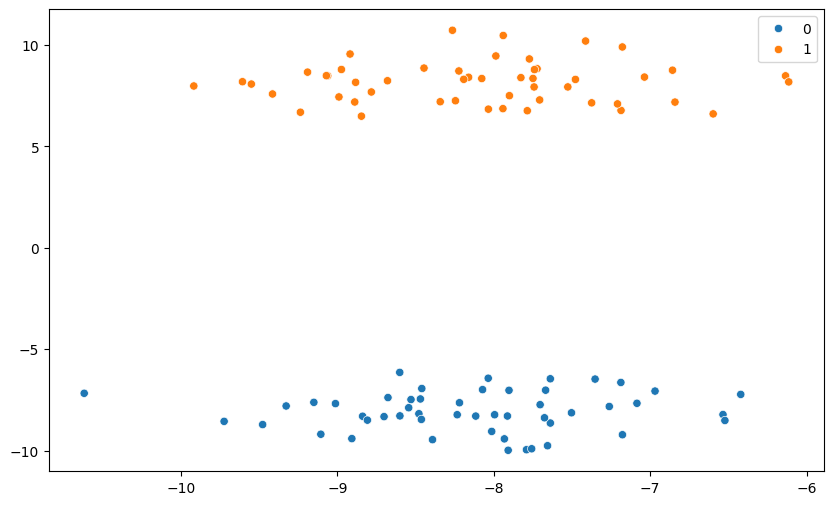

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [65]:
import random
class KMeans:

    def __init__(self, n_clusters=2, max_iter=100):
        
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centriods = None
    
    def fit_predict(self, X):

        # Init Random Centriods 
        random_index = random.sample(range(0,X.shape[0]), self.n_clusters)

        self.centriods = X[random_index]


        for i in range(self.max_iter):
        # Assign Centriods
            cluster_group = self.assign_centriods(X)
        # Move Centriods
            old_centriods = self.centriods
            self.centriods = self.move_centriods(X, cluster_group)
        # Check Finish
            if (old_centriods == self.centriods).all():

                break
        
        return cluster_group
        

    
    def assign_centriods(self, X):

        cluster_group = []
        distances = []

        for row in X:

            for centriod in self.centriods:
                distances.append(np.sqrt(np.dot(row-centriod, row-centriod)))
            
            min_distance = min(distances)

            index_pos = distances.index(min_distance)

            cluster_group.append(index_pos)

            distances.clear()
        
        return np.array(cluster_group)

    def move_centriods(self, X, cluster_group):

        new_centriods = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:

            new_centriods.append(X[cluster_group == type].mean(axis=0))
        
        return np.array(new_centriods)



In [66]:
kmeans = KMeans(n_clusters=2, max_iter=100)

In [68]:
y_pred = kmeans.fit_predict(X)

In [70]:
X[y_pred == 0, 0]

array([-7.52676238, -9.91877122, -8.97468167, -7.74244961, -8.68002472,
       -7.7233092 , -8.88385744, -8.24538812, -7.03662387, -7.18648278,
       -8.88951443, -8.16128571, -8.91942423, -7.94179128, -8.99053633,
       -7.17793984, -8.44651495, -9.06230371, -7.37433265, -7.82681907,
       -7.77254007, -8.07710171, -7.70692753, -7.74011721, -6.84140442,
       -8.03471177, -8.22346279, -7.20896805, -6.13422549, -7.78590626,
       -8.84679372, -6.1138141 , -7.47805843, -9.0708925 , -8.34271452,
       -9.23695071, -9.1913035 , -8.78325329, -6.59720569, -9.60748323,
       -8.19236096, -7.98699811, -9.41537074, -7.41314291, -9.55066343,
       -7.74950715, -7.90034863, -7.93976979, -6.85717719, -8.26465683])

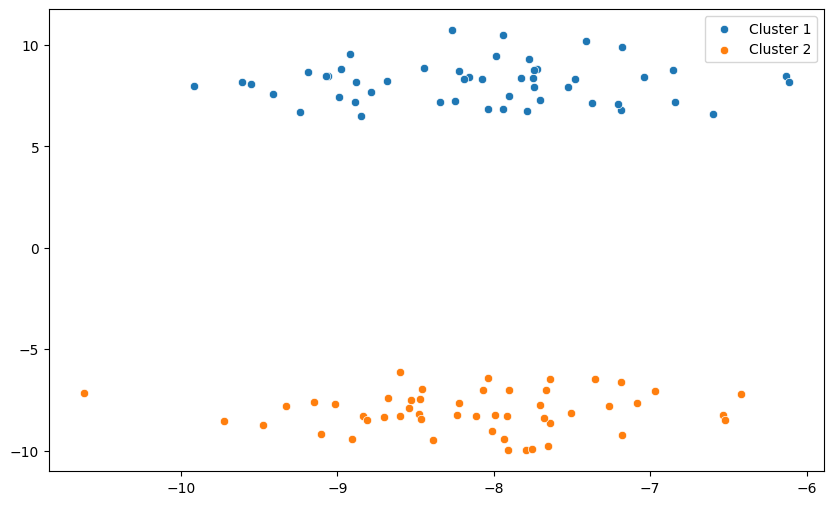

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[y_pred == 0,0], y=X[y_pred == 0, 1], label = "Cluster 1")
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], label = "Cluster 2")
plt.legend()
plt.show()